# Polynomial SVM parameters 🦾🦾

In this morning's optional lecture `03-OPTIONAL_How_to_plot_rbf_parameters.ipynb`, some code allowed to visualize how the hyperparameters $C$ and $gamma$ were influencing the shape of the decision boundary for a SVM classifier using a radial basis function (_rbf_) as kernel. In this exercise, you'll be guided to reproduce the same visualizations for a SVM with polynomial kernel.

1. Import the usual libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

2. Load the iris dataset from ```sklearn``` and create an object X containing the explanatory variables and an object y containing the target variable.

In [30]:
iris = load_iris()
X = iris.data
y = iris.target

3. Keep only the first two columns of X and filter observations so that you only have two different classes for the target variable. This will make it easy to visualize our data, and the predictions of the model.

In [31]:
X_2d = X[:, :2] # keep first two features
X_2d = X_2d[y > 0] # remove class 0 observations from X
y_2d = y[y > 0] # remove class 0 observations from y
y_2d -= 1 # set values of y from {1,2} to {0,1}

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# X2 = X2[Y>0]
# Y = Y[Y>0]

# print(len(X2))
# print(len(Y))





In [ ]:
tmp = pd.DataFrame(X)
tmp["4"] = Y

tmp.head()




,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
tmp.drop([2, 3], axis=1, inplace=True)
tmp.head()


,0,1,4
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [ ]:
X = tmp.drop("4", axis = 1)
X.head()


,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
Y = tmp.loc[:,"4"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: 4, dtype: int32

4. Separate the data between a training set and a test set, and do any necessary preprocessing.

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_2d, y_2d, test_size = 0.3)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

5. What are the hyperparameters for a SVM with polynomial kernel? Are $C$ and $gamma$ still relevant? For each hyperparameter important for polynomial kernels, create a list containing a range of values that will be tested later in a grid search.

In [33]:
# degree
# gamma
# coefs0

C_range = [1e-2, 1, 1e2]
degree_range = [1, 2, 3, 4]
# print(C_range)
# print(degree_range)
# gamma_range = [0.01, 0.1, 1, 10]

6. Create an empty list called classifiers, then loop over the lists of hyperparameter values you defined just above. For each combination of values, train an ```sklearn.svm.SVC``` model with a polynomial kernel.

In [ ]:
# classifiers = []
# for C in C_range:
#     for degree in degree_range:
#         for gamma in gamma_range:
#           clf = SVC(C=C, degree=degree, gamma=gamma, kernel = 'poly')
#           clf.fit(X_train, Y_train)
#           classifiers.append((C, degree, gamma, clf))

# print(classifiers)

[(0.01, 1, 0.01, SVC(C=0.01, degree=1, gamma=0.01, kernel='poly')), (0.01, 1, 0.1, SVC(C=0.01, degree=1, gamma=0.1, kernel='poly')), (0.01, 1, 1, SVC(C=0.01, degree=1, gamma=1, kernel='poly')), (0.01, 1, 10, SVC(C=0.01, degree=1, gamma=10, kernel='poly')), (0.01, 2, 0.01, SVC(C=0.01, degree=2, gamma=0.01, kernel='poly')), (0.01, 2, 0.1, SVC(C=0.01, degree=2, gamma=0.1, kernel='poly')), (0.01, 2, 1, SVC(C=0.01, degree=2, gamma=1, kernel='poly')), (0.01, 2, 10, SVC(C=0.01, degree=2, gamma=10, kernel='poly')), (0.01, 3, 0.01, SVC(C=0.01, gamma=0.01, kernel='poly')), (0.01, 3, 0.1, SVC(C=0.01, gamma=0.1, kernel='poly')), (0.01, 3, 1, SVC(C=0.01, gamma=1, kernel='poly')), (0.01, 3, 10, SVC(C=0.01, gamma=10, kernel='poly')), (0.01, 4, 0.01, SVC(C=0.01, degree=4, gamma=0.01, kernel='poly')), (0.01, 4, 0.1, SVC(C=0.01, degree=4, gamma=0.1, kernel='poly')), (0.01, 4, 1, SVC(C=0.01, degree=4, gamma=1, kernel='poly')), (0.01, 4, 10, SVC(C=0.01, degree=4, gamma=10, kernel='poly')), (1, 1, 0.01, SV

In [34]:
classifiers = []
for C in C_range:
    for degree in degree_range:
        clf = SVC(C=C, degree=degree, kernel = 'poly')
        clf.fit(Xtrain, ytrain)
        classifiers.append((C, degree, clf))

print(classifiers)

[(0.01, 1, SVC(C=0.01, degree=1, kernel='poly')), (0.01, 2, SVC(C=0.01, degree=2, kernel='poly')), (0.01, 3, SVC(C=0.01, kernel='poly')), (0.01, 4, SVC(C=0.01, degree=4, kernel='poly')), (1, 1, SVC(C=1, degree=1, kernel='poly')), (1, 2, SVC(C=1, degree=2, kernel='poly')), (1, 3, SVC(C=1, kernel='poly')), (1, 4, SVC(C=1, degree=4, kernel='poly')), (100.0, 1, SVC(C=100.0, degree=1, kernel='poly')), (100.0, 2, SVC(C=100.0, degree=2, kernel='poly')), (100.0, 3, SVC(C=100.0, kernel='poly')), (100.0, 4, SVC(C=100.0, degree=4, kernel='poly'))]


7. Use the ```np.meshgrid``` function and ```np.linspace``` function in order to create an object xx and an object yy both of shape (200,200) that uniformely map the two dimensional square defined by $(x,y) \forall x\in [-3, 3], y \in [-3, 3]$

In [35]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
print(xx)

[[-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 ...
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]]


8. Use the function ```np.c_``` in order to transform xx and yy into a list of coordinates (a list of [x,y]) mapping the space, and store it under the name sample_grid. You will need to transform xx and yy for this to work.

In [36]:
sample_grid = np.c_[xx.ravel(), yy.ravel()]
sample_grid

array([[-3.        , -3.        ],
       [-2.93939394, -3.        ],
       [-2.87878788, -3.        ],
       ...,
       [ 2.87878788,  3.        ],
       [ 2.93939394,  3.        ],
       [ 3.        ,  3.        ]])

9. Apply the method ```.decision_function``` from the seventh element of classifiers to sample_grid, what comes out ? Store this value in an object named Z. Check the decision_function [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) to learn more.

In [37]:
_,_,classif = classifiers[6]
Z = classif.decision_function(sample_grid)
Z

array([-21.96035253, -21.30606304, -20.67299375, ...,  20.95899606,
        21.59206535,  22.24635484])

10. Plot -Z using the ```pcolormesh``` function, xx, yy, and cmap=plt.cm.RdBu

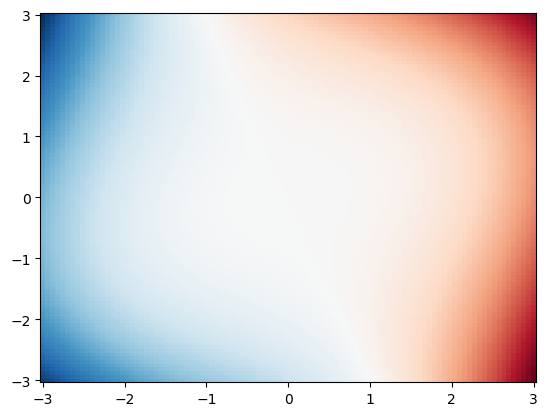

In [38]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)

11. In order to put this in context, add to the same graph the coordinates of your observations with a different color for each category of y, you can use the argument : cmap=plt.cm.RdBu_r

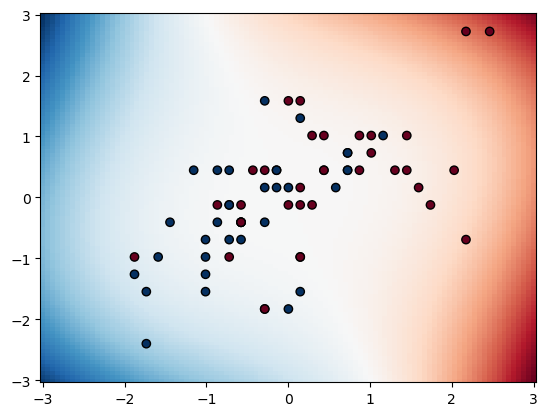

In [39]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r,edgecolors='k')

12. Add another plot that draws the decision boundary of our model.

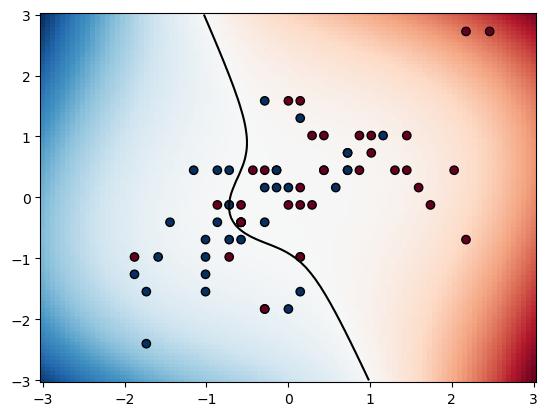

In [40]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r, edgecolors='k')
plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")

12. Loop over ```enumerate(classifiers)``` to produce a similar figure for each of the different classifiers 

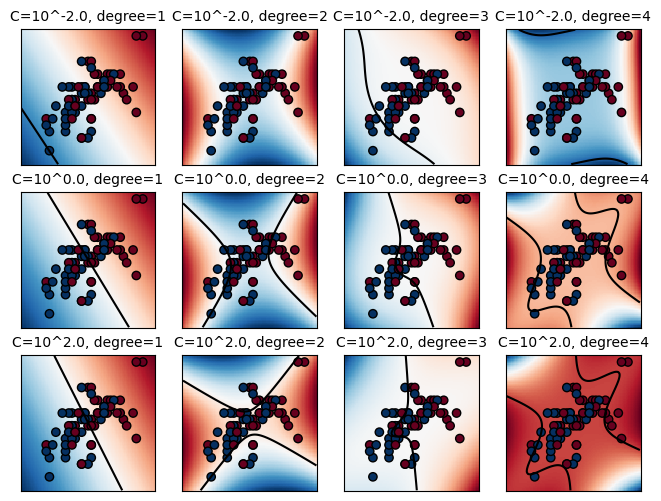

In [41]:
plt.figure(figsize=(8, 6))
for (k, (C, degree, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(sample_grid)
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(degree_range), k + 1)
    plt.title("C=10^{0}, degree={1}".format(np.log10(C), degree),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

13. Now replace the train sets with the test sets in the loop and look at the results. How do the parameters $C$ and $gamma$ influence the performances of the model ?

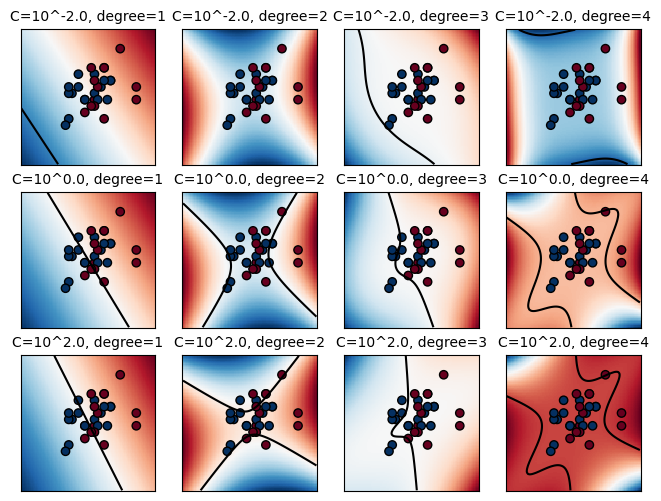

In [42]:
plt.figure(figsize=(8, 6))
for (k, (C, degree, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(sample_grid)
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(degree_range), k + 1)
    plt.title("C=10^{0}, degree={1}".format(np.log10(C), degree),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')